In [294]:
# word count for words in Markdown section
import io
from nbformat import current
def nb_word_count(nb_path):
    with io.open(nb_path, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')
        word_count = 0
        for cell in nb.worksheets[0].cells:
            if cell.cell_type == "markdown":
                word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    return word_count
nb_word_count(" MSIN0143_2021_GROUP_J1.ipynb")

word_count_real = 1938
print(f"The real word count based on hard copying the text in word is {word_count_real}. Please check the appendix.")

2144

The real word count based on hard copying the text in word is 1938. Please check the appendix.


# Table of Contents
* [1. Introduction](#1.-Introduction)
    * [Business Objective and Problem Framing](#-Business-Objective-and-Problem-Framing)
* [2. Data Description](#2.-Data-Description)
    * [2.1 Library Import and Predefined Functions](#2.1-Library-Import-and-Predefined-Functions)
    * [2.2 Data Loading](#2.2-Data-Loading)
    * [2.3 Datasets Overview](#2.3-Datasets-Overview)
* [3. Data Preprocessing](#3.-Data-Preprocessing)
    * [3.1 Data Transformation](#3.1-Data-Transformation)
    * [3.2 Neighbourhood Group and Short-term Rentals](#3.2-Neighbourhood-Group-and-Short-term-Rentals)
    * [3.3 Income and Occupancy](#3.3-Income-and-Occupancy)
    * [3.4 Dealing with Missing Values](#3.4-Dealing-with-Missing-Values)
* [4. Exploratory Analysis](#4.-Exploratory-Analysis)
    * [4.1 Location Based Analysis](#4.1-Location-Based-Analysis)
    * [4.2 Price Based Analysis](#4.2-Price-Based-Analysis)
    * [4.3 Duration Based Analysis](#4.3-Duration-Based-Analysis)
    * [4.4 Income Based Analysis](#4.4-Income-Based-Analysis)
    * [4.5 Keyword Based Analysis](#4.5-Keyword-Based-Analysis)
* [5. Conclusion and Limitation](#5.-Conclusion-and-Limitation)
    * [5.1 Findings](#5.1-Findings)
    * [5.2 Limitation](#5.2-Limitation)
    * [5.3 Recommendation](#5.3-Recommendation)
* [Reference](#Reference) -> if there are any
* [Appendix](#Appendix) -> for Trello

# 1. Introduction

## Business Objective and Problem Framing

This report is aiming at helping current and potential Airbnb hosts to identify underlying important features of Airbnb listings which would lead to a higher income. 

The analysis is based on the following scopes:

* Listing location and neighbourhood group
* Rental duration type
* Listing price
* Keywords in the name of listings

Apart from above, this report employed decision tree model to determine relatively important features of Airbnb listings which can lead to a higher income for hosts.

# 2. Data Description
## 2.1 Library Import and Predefined Functions


In [295]:
################
## Important: ##
################
## This notebook requires a updated 3.5.0 version of matplotlib, 
## please run following code to upgrade matplotlib, comment on it and restart the kernel

#!pip install -U matplotlib==3.5.0
import matplotlib
#matplotlib.__version__ # check matplotlib version

In [296]:
#!pip install folium
#!pip install branca
!pip install -c conda-forge folium=0.4.0 --yes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

# plotting libs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss 
import folium as fl 
from folium.plugins import HeatMap 
from folium.plugins import PolyLineTextPath 

# sklearn modules
import sklearn as sklearn
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import GridSearchCV

# Wordcloud modules
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #MT

# This code sets general parameters of the graphs we want to draw
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False 
plt.rcParams['figure.figsize'] = [16.0,16.0]


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option:

In [297]:
# predifined function for simple plots
# Xifan Zou
def bar_plot(x,y,xlabel,ylabel, title, align, bar_width):
    plt.bar(x,y,align = align, width = bar_width)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xticks(xticks)
    plt.title(title)
    plt.show()

 ## 2.2 Data Loading

The source of our data "listing.csv" is from http://insideairbnb.com/get-the-data.html. It's a summary information and metrics for listings in London, scraped on 09 September 2021.

In [298]:
df = pd.read_csv('listings.csv') #read CSV

## 2.3 Datasets Overview

In [299]:
print(f"For the raw dataset, there are %s variables, the total number of observations are %s." %(len(df.dtypes),len(df)))

For the raw dataset, there are 18 variables, the total number of observations are 70617.


In [300]:
# demonstrate the variables in raw data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70617 entries, 0 to 70616
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              70617 non-null  int64  
 1   name                            70593 non-null  object 
 2   host_id                         70617 non-null  int64  
 3   host_name                       69942 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   70617 non-null  object 
 6   latitude                        70617 non-null  float64
 7   longitude                       70617 non-null  float64
 8   room_type                       70617 non-null  object 
 9   price                           70617 non-null  int64  
 10  minimum_nights                  70617 non-null  int64  
 11  number_of_reviews               70617 non-null  int64  
 12  last_review                     

In [301]:
#Some general stats of our numerical values.
#Ian L. 
SumVars = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365'] 
df[SumVars].describe().apply(lambda x:round(x,3)).T

count     mean      std  min   25%   50%    75%      max
price              70617.0  137.490  302.703  0.0  45.0  80.0  139.0  17709.0
minimum_nights     70617.0    6.718   31.590  1.0   1.0   2.0    4.0   1125.0
number_of_reviews  70617.0   14.947   35.394  0.0   0.0   3.0   13.0    893.0
availability_365   70617.0  108.376  138.376  0.0   0.0  10.0  223.0    365.0

In [302]:
#Some sub-groups as well. See how mean and max changes with different types of accomodation 
# Ian L. and Dorin U. 
df.loc[df['room_type'] == 'Entire home/apt'][SumVars].describe().apply(lambda x:round(x,3)).T
df.loc[df['room_type'] == 'Private room'][SumVars].describe().apply(lambda x:round(x,3)).T

count     mean      std  min   25%    50%    75%      max
price              39115.0  181.588  339.055  7.0  84.0  120.0  181.0  17709.0
minimum_nights     39115.0    7.672   32.258  1.0   2.0    3.0    5.0   1124.0
number_of_reviews  39115.0   12.933   27.052  0.0   0.0    3.0   14.0    893.0
availability_365   39115.0  101.828  134.707  0.0   0.0    3.0  200.0    365.0

count     mean      std  min   25%   50%    75%     max
price              30527.0   82.052  240.330  0.0  31.0  45.0   62.0  8000.0
minimum_nights     30527.0    5.619   31.081  1.0   1.0   2.0    3.0  1125.0
number_of_reviews  30527.0   17.598   43.670  0.0   0.0   2.0   12.0   856.0
availability_365   30527.0  114.564  141.698  0.0   0.0  30.0  252.0   365.0

# 3. Data Pre-processing

## 3.1 Data Transformation

In [303]:
# Change variables to category - We are not gonna use ID as a number for stats but as identifier for counts.
# Same with the other identifiers, we should turn them to categories.
# Ian L. and Xifan Z. 
df['id'] = df['id'].astype('category')
df['host_id'] = df['host_id'].astype('category')
df['host_name'] = df['host_name'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70617 entries, 0 to 70616
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              70617 non-null  category
 1   name                            70593 non-null  object  
 2   host_id                         70617 non-null  category
 3   host_name                       69942 non-null  category
 4   neighbourhood_group             0 non-null      float64 
 5   neighbourhood                   70617 non-null  category
 6   latitude                        70617 non-null  float64 
 7   longitude                       70617 non-null  float64 
 8   room_type                       70617 non-null  category
 9   price                           70617 non-null  int64   
 10  minimum_nights                  70617 non-null  int64   
 11  number_of_reviews               70617 non-null  int64   
 12  last_review       

## 3.2 Neighbourhood Group and Short-term Rentals


In this section, two additional variables will be created.

Because the variable *neighbourhoods* in our dataset include all the neighbourhoods' names in London, we categorize them into different districts based on Wikipedia (List of sub-regions used in the London Plan - Wikipedia, 2021) to have better visualizations. 

In [304]:
## segmentation of London neigbourhood from wiki
# Xifan Z.

group_dict = {'Central': " Camden, City of London, Kensington and Chelsea, Islington, Lambeth, Southwark, Westminster,",
 'East': " Barking and Dagenham, Bexley, Greenwich, Hackney, Havering, Lewisham, Newham, Redbridge, Tower Hamlets, Waltham Forest,",
 'West':" Brent, Ealing, Hammersmith and Fulham, Harrow, Richmond upon Thames, Hillingdon, Hounslow,",
 'North': " Barnet, Enfield, Haringey,",
 'South': " Bromley, Croydon, Kingston upon Thames, Merton, Sutton, Wandsworth"}

def split_str(name):
    name = name.split(',')
    return [char.replace(' ','',1) for char in name]

for k in group_dict.keys():
    group_dict[k] = split_str(group_dict[k])
    
# Check if there are any differences between the original neighbourhood col and the one from wiki
len(pd.unique(df['neighbourhood']))
a = set(df.neighbourhood)
b = set()
for v in group_dict.values():
    for char in v:
        b.add(char)
a.difference(b)

33

set()

To double-check if there are any inconsistencies between neighbourhoods in our dataset and that from the wiki, results above showed they are consistent.

In [305]:
# updating neighbourhood_group column
# Xifan Z. 
temp_list = []
for names in df.neighbourhood:
    for k in group_dict.keys():
        if names in group_dict[k]:
            temp_list.append(k) 
df['neighbourhood_group'] = temp_list

df.neighbourhood_group.value_counts()

Central    30026
East       19380
West        9937
South       7163
North       4111
Name: neighbourhood_group, dtype: int64

Additionally, to make *minimum_nights* insightful, we make a dummy variable *short_term* out of *minimum_nights*. The underlying idea is that if the required minimum nights for a listing in London is shorter than or equal to 28 days (Airbnb, 2021; TRVLGUIDES, 2021), it will be classified as a short-term rental then *short_term* = 1. 

In [306]:
# show the number of observations per subgroup
# Xifan Z.
sr = df.minimum_nights[df['minimum_nights'] <= 28].count()
lr = df.minimum_nights[df['minimum_nights'] > 28].count()
print(f"The total number of short-term rentals we have is {sr}; \nThe total number of long-term rentals we have is {lr}.")

The total number of short-term rentals we have is 68324; 
The total number of long-term rentals we have is 2293.


In [307]:
# create new column 'short_term'
# Xifan Z.
temp_li = []
for nights in df.minimum_nights:
    if nights <= 28:
        temp_li.append(1)
    else:
        temp_li.append(0)
df['short_term'] = temp_li
# To check the consistency after transforming the temporary list into panda series
df.short_term.value_counts()

1    68324
0     2293
Name: short_term, dtype: int64

---

## Detecting Outliers in Price Variable 

Text(0.5, 1.0, 'Price Outliers')

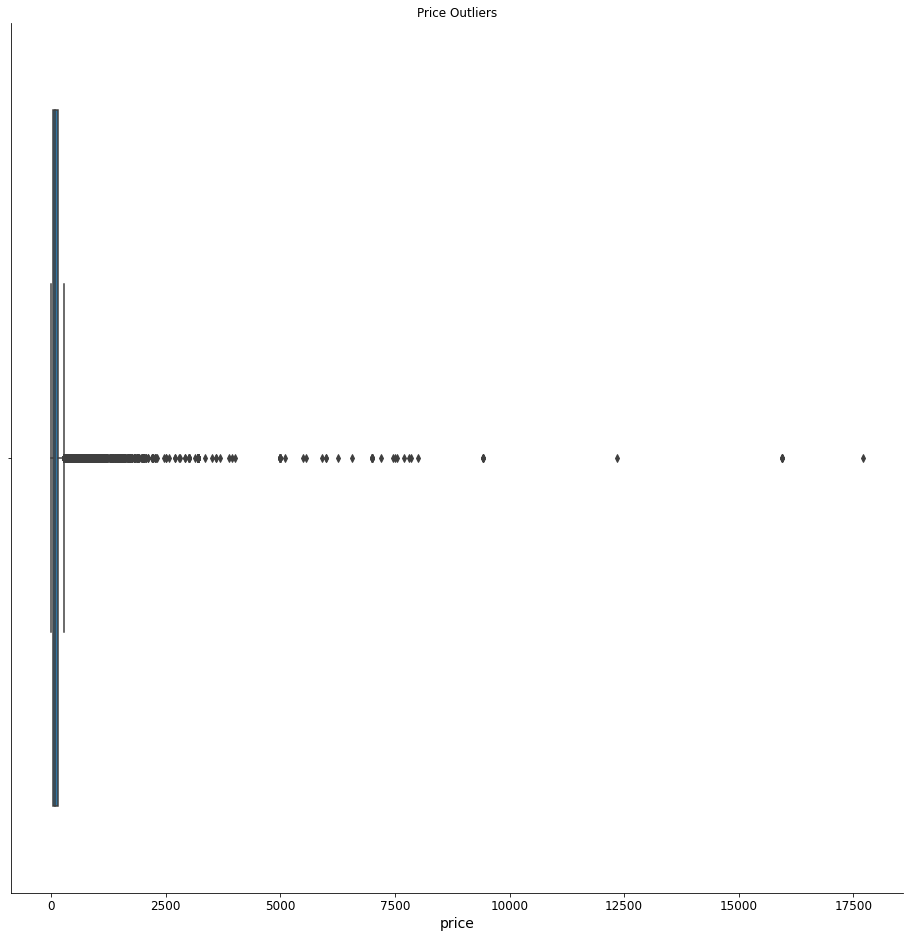

In [308]:
#Tsvetina C.
#plot graph showcasing price outliers
sns.boxplot(x=df['price']).set_title('Price Outliers') 

The graph above showcases that there are in fact outliers. However, taking into consideration that London is one of the most expensive cities to live in, outliers are not removed as they are most probably correct listings.

<AxesSubplot:xlabel='price'>

(0.0, 1000.0)

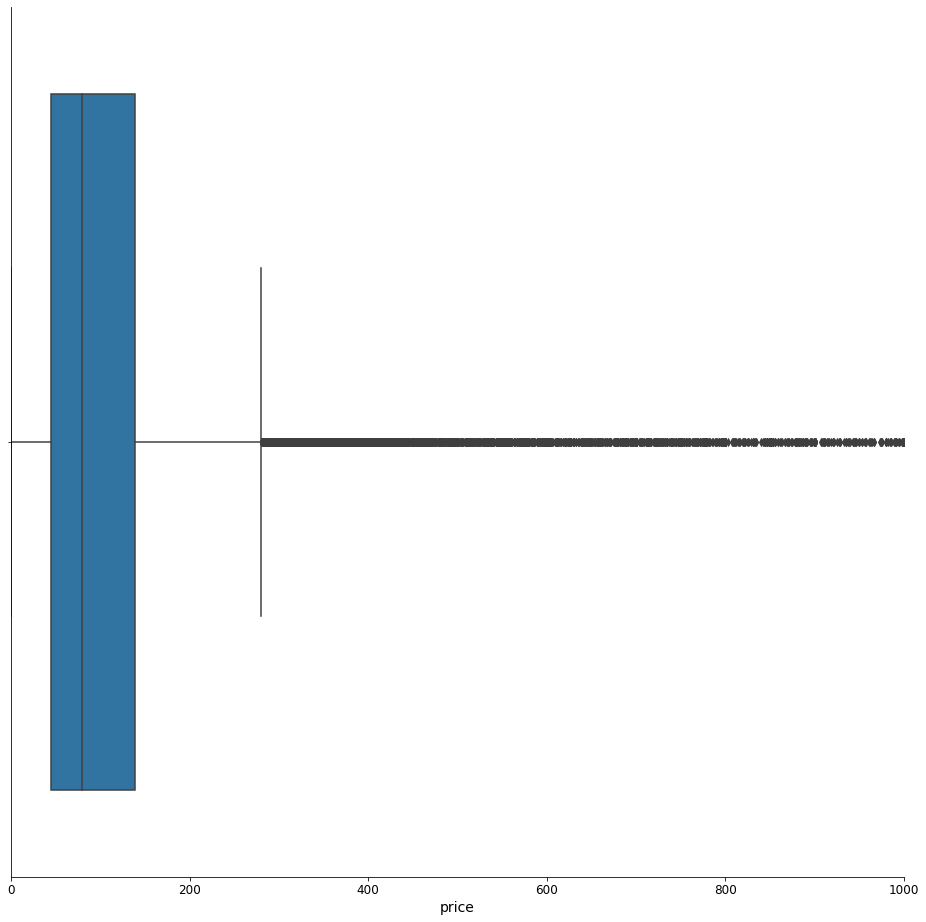

In [309]:
#Tsvetina C. 
sns.boxplot(x=df['price'])
plt.xlim(0,1000) #"zoom in" on the box plot to show values until 1000

In [310]:
#Tsvetina C.
#Check if data is correct within availability_365. There are no values above 365, so it is correct.
df.loc[df['availability_365'] > 365]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, short_term]
Index: []

## 3.3 Income and Occupancy 

Because there is no direct income and occupancy rate data, we calculated it indirectly as follows:

In [311]:
#Markus T. 
df["months_of_operation"] = df["number_of_reviews"]/df["reviews_per_month"] #to create a new category which will aid in income calculation
df.loc[df['months_of_operation'] > 120] 
df["nights_occupied_per_year"] = ((df["number_of_reviews"]*2)*4.6)/(df["months_of_operation"]/12); #MT

Another category was created for nights occupied per year. This was done assuming a review rate of 50%, meaning 50% of all people who stay at an Airbnb leave a review. The average stay was assumed to be 4.6 nights. So, number of reviews x 2 x 4.6 / years of operation finds the actual nights occupied per year.

The determined 50% review rate (Sfbos.org, 2015) is in line with what "Inside Airbnb", the main source for our dataset, recommends (Inside Airbnb, 2021).

The 4.6 average nights per stay was used based on Airbnb data for London (Atairbnb, 2021).

In [312]:
#Markus T. 
df.loc[df['nights_occupied_per_year'] > 365] #Cannot be over 365 per year, this must be capped, with 70% chosen. MT


id                                               name    host_id  \
8         36660                    You are GUARANTEED to love this     157884   
20        42010                           You Will Save Money Here     157884   
74        85191                Maisonette in Central London Zone 1     466353   
85        90700                  Sunny Notting Hill flat & terrace     491286   
113      107048               A Luxury Studio Suite in Clerkenwell     259088   
...         ...                                                ...        ...   
69343  51601138  2-Double Room next to Bermondsey and Tower Bridge  362772409   
69506  51667824                Lovely 2 bed flat in Central London  370290418   
69508  51668198             Beautiful 1 bed flat Next to Hyde Park  372675278   
69718  51752259                Lovely Studio, Riverside View, Gym.   62820236   
69997  51872973                Spacious 3 bed flat in North London  370270698   

          host_name neighbourhood_group           neighbourhood   latitude  \
8      Agri & Roger               North                Haringey  51.584610   
20     Agri & Roger               North                  Barnet  51.586110   
74       Elisabetta             Central                 Lambeth  51.491680   
85             Chil             Central  Kensington and Chelsea  51.511090   
113           Simon             Central               Islington  51.524780   
...             ...                 ...                     ...        ...   
69343         Kamil             Central               Southwark  51.496710   
69506       Darinka             Central             Westminster  51.513790   
69508        Atahan             Central  Kensington and Chelsea  51.497431   
69718          Samy                East               Greenwich  51.502100   
69997         Milan               North                Haringey  51.586470   

       longitude        room_type  price  ...  number_of_reviews  last_review  \
8      -0.161700     Private room     72  ...                538   2019-12-19   
20     -0.162720     Private room     60  ...                510   2020-01-12   
74     -0.115700     Private room     58  ...                415   2019-12-10   
85     -0.198420  Entire home/apt     93  ...                362   2021-04-05   
113    -0.104840  Entire home/apt    144  ...                473   2019-10-28   
...          ...              ...    ...  ...                ...          ...   
69343  -0.064450     Private room     55  ...                  4   2021-08-31   
69506  -0.154141  Entire home/apt    210  ...                  4   2021-09-02   
69508  -0.178481  Entire home/apt    200  ...                  4   2021-08-23   
69718   0.007690  Entire home/apt    100  ...                  5   2021-09-09   
69997  -0.080820  Entire home/apt    127  ...                  4   2021-08-31   

      reviews_per_month  calculated_host_listings_count  availability_365  \
8                  4.72                               2               332   
20                 4.24                               2               164   
74                 3.48                               1               349   
85                 3.36                               2               259   
113                4.54                               4               284   
...                 ...                             ...               ...   
69343              4.00                               4               284   
69506              4.00                               2               325   
69508              4.00                               1               365   
69718              5.00                               1               267   
69997              4.00                               2               341   

       number_of_reviews_ltm  license  short_term  months_of_operation  \
8                         10      NaN           1           113.983051   
20                         0      NaN           1        

In [313]:
#Markus T. 
.70*365 #255 days per year is 70% occupancy MT

255.49999999999997

In [314]:
#Markus T. 
index = df[df['nights_occupied_per_year']>255].index # cap those greater than 255 to equal 255 MT
df.loc[index, "nights_occupied_per_year"] = 255

Due to some properties having a disproportionate amount of review, a cap of 70% occupancy (255 days a year) was chosen, this reflects the high-usage "hotel type" properties. Numerous columns were added below reflecting income and occupancy rate:

In [315]:
#Markus T. 
df["income_earned_per_year"] = df["nights_occupied_per_year"]*df['price'] #new category MT
df["income_per_month"] = df['income_earned_per_year'] / 12 #new category MT
df.loc[df['income_per_month'] > 50000] #exploring high monthly earners MT

id                                               name    host_id  \
12448  11851238    Wonderful Apartment Near ExCeL & Central London   63162841   
18550  16401093                        Apartment 1, 48 Bishopsgate   43935156   
27162  21670579       Historic 1920s House moments from the Thames  157629002   
33010  25494855            Lovely KINGSIZE bed Tolworth (Surbiton)   55381534   
41054  32003129                              Eldon Chambers Flat 2   43935156   
44905  35147750                                    F3 Greek Street   43935156   
44915  35152393                                    F5 Greek Street   43935156   
57910  44050348  Luxury-Apartment-Ensuite with Bath-City View-2...  102490355   
59576  45322428  -55% Bright Studio ❤ Marylebone♡10min→Oxford C...  129230780   
59888  45511388  -55% Magnificent Studio ❤ of Oxford Circus❤ 2m...  129230780   

         host_name neighbourhood_group         neighbourhood  latitude  \
12448       Saiful                East         Tower Hamlets  51.51578   
18550  City Living             Central        City of London  51.51401   
27162        David             Central             Southwark  51.49927   
33010     Fabricio               South  Kingston upon Thames  51.37845   
41054  City Living             Central           Westminster  51.51387   
44905  City Living             Central           Westminster  51.51327   
44915  City Living             Central           Westminster  51.51385   
57910    Park Lane             Central           Westminster  51.51321   
59576    STK Homes             Central           Westminster  51.52189   
59888    STK Homes             Central           Westminster  51.52141   

       longitude        room_type  price  ...  reviews_per_month  \
12448   -0.04595  Entire home/apt   7186  ...               1.02   
18550   -0.08215  Entire home/apt  15938  ...               1.12   
27162   -0.06188  Entire home/apt  17709  ...               1.16   
33010   -0.27368     Private room   7000  ...               1.26   
41054   -0.11220  Entire home/apt  15938  ...               0.47   
44905   -0.13180  Entire home/apt  15938  ...               0.62   
44915   -0.13185  Entire home/apt  15938  ...               0.48   
57910   -0.14762  Entire home/apt   5914  ...               1.90   
59576   -0.14339  Entire home/apt   3200  ...               1.82   
59888   -0.14386  Entire home/apt   3200  ...               1.71   

       calculated_host_listings_count availability_365  number_of_reviews_ltm  \
12448                               1                0                      0   
18550                              36              357                      0   
27162                               1              365                      0   
33010                               1              365                      0   
41054                              36              360                      0   
44905                              36              365                      0   
44915                              36              365                      0   
57910                              16                0                      8   
59576                             123                0                      2   
59888                             123              109                      2   

       license  short_term  months_of_operation  nights_occupied_per_year  \
12448      NaN           0            59.803922                   112.608   
18550      NaN           1            57.142857                   123.648   
27162      NaN           1            43.965517                   128.064   
33010      NaN           1            34.126984                   139.104   
41054      NaN           1            27.659574                    51.888   
44905      NaN           1            27.419355                    68.448   
44915      NaN           1            25.000000                    52.992   
57910      NaN           1            13.157895  

In [316]:
#Markus T. 
df["total_income_earned"] = df["income_per_month"]*df["months_of_operation"] #MT
df["occupancy_rate"] = df["nights_occupied_per_year"]/365 #rate in which air bnb is occupied #MT
df_copy = df.copy() #creating a copy for future use

With further analysis, income and occupancy data will help Airbnb owners determine which neighbourhoods and property types produce the most value.

## 3.4 Dealing with Missing Values

In order to begin the exploratory analysis, we must check the data for any missing values that could skew the results. 

In [317]:
#Ian L. 
df.isnull().sum() #check how many null values there are

id                                    0
name                                 24
host_id                               0
host_name                           675
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       21087
reviews_per_month                 21087
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           70617
short_term                            0
months_of_operation               21087
nights_occupied_per_year          21087
income_earned_per_year            21087
income_per_month                  21087
total_income_earned               21087
occupancy_rate                    21087


In [318]:
#Ian L. 
df = df.drop(['license', 'last_review'], 1) #drop 2 columns
df.describe()
df.isnull().sum()
# print out number of null values in df aftering dropping 2 columns

/tmp/ipykernel_21439/1913487312.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['license', 'last_review'], 1) #drop 2 columns


latitude     longitude         price  minimum_nights  \
count  70617.000000  70617.000000  70617.000000    70617.000000   
mean      51.509848     -0.128761    137.489528        6.717504   
std        0.047755      0.096498    302.702928       31.589879   
min       51.297330     -0.508870      0.000000        1.000000   
25%       51.484120     -0.188630     45.000000        1.000000   
50%       51.513910     -0.126280     80.000000        2.000000   
75%       51.539700     -0.069460    139.000000        4.000000   
max       51.686410      0.288570  17709.000000     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       70617.000000       49530.000000                    70617.000000   
mean           14.947010           0.690920                       32.757141   
std            35.394124           1.697638                      128.979783   
min             0.000000           0.010000                        1.000000   
25%             0.000000           0.090000                        1.000000   
50%             3.000000           0.300000                        1.000000   
75%            13.000000           0.840000                        4.000000   
max           893.000000         118.290000                      864.000000   

       availability_365  number_of_reviews_ltm    short_term  \
count      70617.000000           70617.000000  70617.000000   
mean         108.375816               1.381197      0.967529   
std          138.376088               5.976998      0.177248   
min            0.000000               0.000000      0.000000   
25%            0.000000               0.000000      1.000000   
50%           10.000000               0.000000      1.000000   
75%          223.000000               1.000000      1.000000   
max          365.000000             424.000000      1.000000   

       months_of_operation  nights_occupied_per_year  income_earned_per_year  \
count         49530.000000              49530.000000            4.953000e+04   
mean             37.934667                 63.405263            7.349710e+03   
std              23.166350                 71.990216            2.274394e+04   
min               1.000000                  1.104000            0.000000e+00   
25%              22.222222                  9.936000            7.065600e+02   
50%              34.328358                 33.120000            2.741232e+03   
75%              50.000000                 92.736000            8.280000e+03   
max             140.000000                255.000000            2.267885e+06   

       income_per_month  total_income_earned  occupancy_rate  
count      49530.000000         4.953000e+04    49530.000000  
mean         612.475856         1.836539e+04        0.173713  
std         1895.328182         7.330961e+04        0.197233  
min            0.000000         0.000000e+00        0.003025  
25%           58.880000         1.564000e+03        0.027222  
50%          228.436000         5.474000e+03        0.090740  
75%          690.000000         1.835400e+04        0.254071  
max       188990.448000         9.384294e+06        0.698630

id                                    0
name                                 24
host_id                               0
host_name                           675
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 21087
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
short_term                            0
months_of_operation               21087
nights_occupied_per_year          21087
income_earned_per_year            21087
income_per_month                  21087
total_income_earned               21087
occupancy_rate                    21087
dtype: int64

In [319]:
#Ian L. 
df[df['name'].isnull()] #see which rows have NaN for name 

id name    host_id         host_name neighbourhood_group  \
790      544258  NaN     806965             Neave                West   
1756    1346531  NaN    1549541      Ben & Spyros                East   
3609    3815154  NaN   19616970            Harald               North   
4908    5200577  NaN   24822977           Gregory             Central   
5394    5799918  NaN   30091099          Veronica             Central   
6336    6686665  NaN   34923907           Michiel                East   
6776    6997727  NaN   36687818              Enea             Central   
7746    7661166  NaN    2703657              Will             Central   
7837    7715075  NaN   37182187              Lily             Central   
8392    8131510  NaN    3914430               Bea                East   
9249    8946230  NaN    2655073            Verena             Central   
9574    9204579  NaN   47875527              Alex               South   
10180   9666936  NaN   49016292           Miglena                East   
10471   9833194  NaN   27895768            Helena             Central   
10515   9859465  NaN   37655947           Olivier             Central   
11627  11037571  NaN   21580058           Soledad                East   
11910  11311660  NaN   17716960              Adam                East   
12225  11621478  NaN   23728914            Pierre                East   
12765  12125819  NaN   65060574               Ana                West   
13196  12542110  NaN   31393535  Marie-Frédérique               South   
15579  14051483  NaN   84273981            Sergio             Central   
17394  15585236  NaN  100416332                Mc                East   
22083  18908642  NaN    8601197             Peter               South   
29892  23268887  NaN  173198187                 D             Central   

                neighbourhood  latitude  longitude        room_type  price  \
790    Hammersmith and Fulham  51.50745   -0.23028  Entire home/apt    115   
1756                  Hackney  51.54840   -0.06836  Entire home/apt     80   
3609                 Haringey  51.58842   -0.10759     Private room     12   
4908              Westminster  51.51162   -0.18558     Private room     45   
5394                Southwark  51.46127   -0.09099     Private room     40   
6336            Tower Hamlets  51.51624   -0.06901     Private room     35   
6776              Westminster  51.51296   -0.18850     Private room     75   
7746                   Camden  51.54673   -0.14664     Private room     55   
7837              Westminster  51.52928   -0.18343     Private room     45   
8392            Tower Hamlets  51.51840   -0.06546     Private room     80   
9249                Southwark  51.49780   -0.04704     Private room     73   
9574               Wandsworth  51.47569   -0.16551      Shared room     16   
10180                  Newham  51.51249    0.03633     Private room     20   
10471                 Lambeth  51.45238   -0.12921     Private room     36   
10515               Islington  51.52465   -0.09624  Entire home/apt    120   
11627                 Hackney  51.53377   -0.09060     Private room     19   
11910           Tower Hamlets  51.51796   -0.02683     Private room     70   
12225           Tower Hamlets  51.51799   -0.06847     Private room     49   
12765                   Brent  51.53685   -0.25025     Private room    656   
13196                  Merton  51.43716   -0.19894  Entire home/apt    150   
15579                 Lambeth  51.47023   -0.12353     Private room     20   
17394                 Hackney  51.54542   -0.06650     Private room     30   
22083                 Bromley  51.36145    0.02814  Entire home/apt     87   
29892               Islington  51.55102   -0.11561  Entire home/apt     79   

       ...  calculated_host_listings_count  availability_365  \
790    ...                               2                71   
1756   ...                               2               133   
3609   ...                               1  

In [320]:
#Ian L. 
df = df.dropna() #drop NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49509 entries, 0 to 70412
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              49509 non-null  category
 1   name                            49509 non-null  object  
 2   host_id                         49509 non-null  category
 3   host_name                       49509 non-null  category
 4   neighbourhood_group             49509 non-null  object  
 5   neighbourhood                   49509 non-null  category
 6   latitude                        49509 non-null  float64 
 7   longitude                       49509 non-null  float64 
 8   room_type                       49509 non-null  category
 9   price                           49509 non-null  int64   
 10  minimum_nights                  49509 non-null  int64   
 11  number_of_reviews               49509 non-null  int64   
 12  reviews_per_month 

In [321]:
print(f"After data cleaning and transformation, there are %s variables, the total number of observations are %s." %(len(df.dtypes),len(df)))

After data cleaning and transformation, there are 23 variables, the total number of observations are 49509.


# 4. Exploratory Analysis 
## 4.1 Location Based Analysis

In [322]:
df.neighbourhood.value_counts() #Ian L.  

Westminster               5303
Tower Hamlets             4237
Hackney                   3896
Camden                    3495
Kensington and Chelsea    3370
Southwark                 2999
Islington                 2947
Lambeth                   2880
Wandsworth                2560
Hammersmith and Fulham    2348
Lewisham                  1457
Brent                     1405
Haringey                  1349
Newham                    1115
Ealing                    1102
Greenwich                 1020
Barnet                     991
Waltham Forest             870
Richmond upon Thames       762
Merton                     744
Croydon                    713
Hounslow                   672
Redbridge                  424
Hillingdon                 415
Bromley                    395
Enfield                    384
Kingston upon Thames       362
Harrow                     289
City of London             243
Barking and Dagenham       234
Havering                   178
Sutton                     178
Bexley  

Westminster, Tower Hamlets and Hackney have the most Airbnb rentals. Interesting that these London Boroughs are in different neighbourhood groups. 

<Figure size 720x720 with 0 Axes>

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


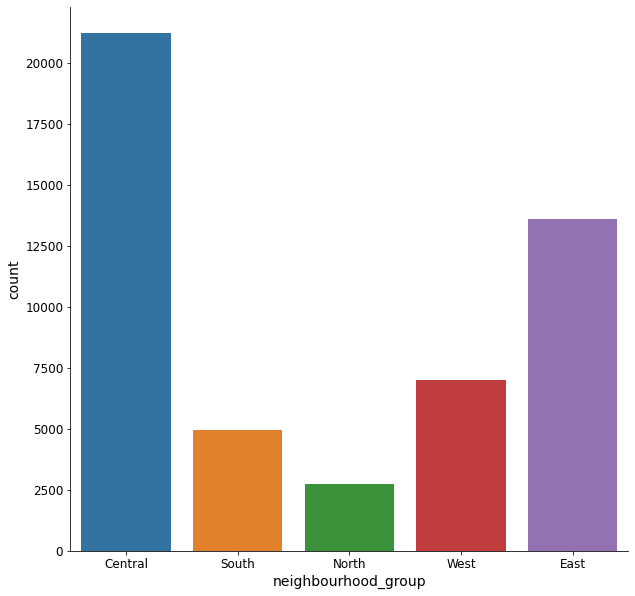

In [323]:
#Ian L. and Tsvetina C.  
plt.figure(figsize=(10,10))
ax = sns.countplot(df["neighbourhood_group"])

The Central area of London has the most amount of Airbnbs followed by East due to being highly touristic areas.

In [324]:
#Ian L. and Tsvetina C.  
df.room_type.value_counts()

Entire home/apt    28708
Private room       20212
Hotel room           323
Shared room          266
Name: room_type, dtype: int64

We explore the categories for 'room_type'. The most common types Airbnb accommodation are entire home or private room by a big difference. We see very few shared accommodations. 

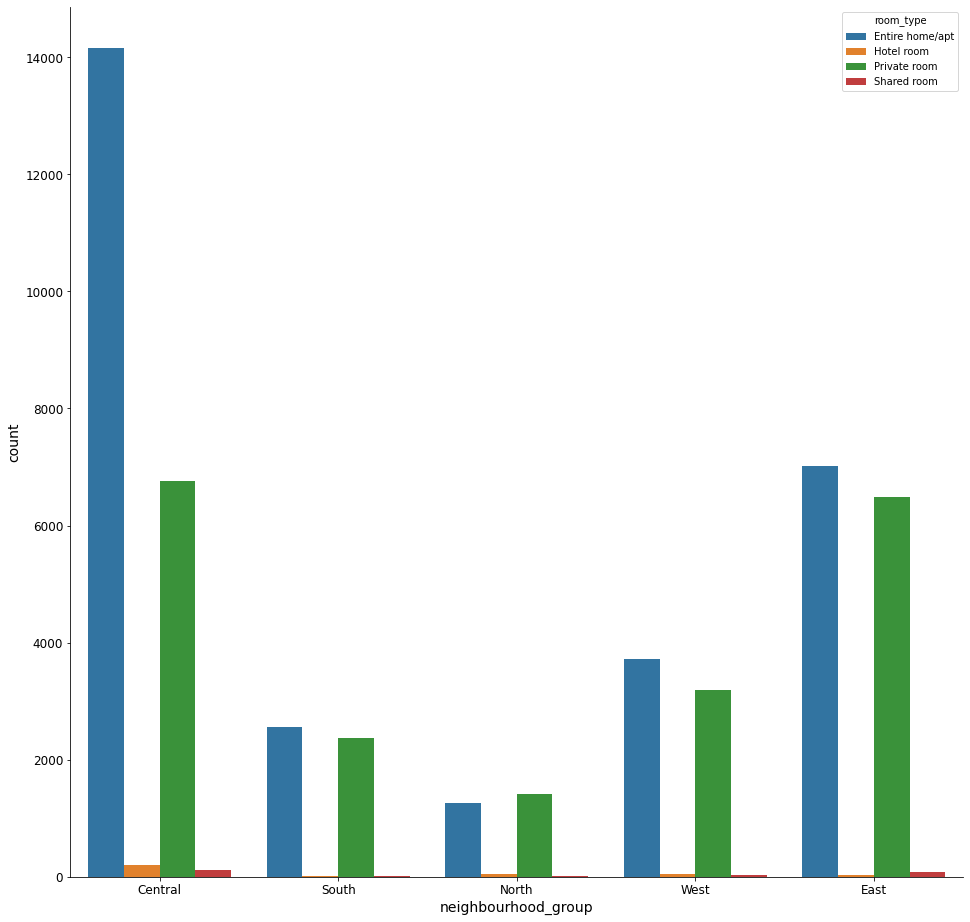

In [325]:
#Ian L. and Tsvetina C.  
ax = sns.countplot(x = df.neighbourhood_group,hue = df.room_type) #Ian and Xifan 

The graph above shows the distribution of room types per area of London.

In [326]:
#Create function so that it can be reused as a base for map
#Ian L, Tsvetina C. and Xifan Z. 
def draw_map():
    london = [df.latitude.mean(), df.longitude.mean()]
    boroughs = df.groupby('neighbourhood').mean().reset_index()
    boroughs_name = boroughs['neighbourhood'].values.tolist()
    boroughs_loc = boroughs[['latitude', 'longitude']].values.tolist()
    base_map = fl.Map(location = london, control_scale = True, zoom_start = 11, tiles = 'OpenStreetMap')

    for i in range(len(boroughs_name)):
        attr = {'font-weight': 'bold', 'font-size': '15'}
        pl = fl.PolyLine([[boroughs_loc[i][0], boroughs_loc[i][1]-.1], [boroughs_loc[i][0], boroughs_loc[i][1]+.1]], weight = 15, color = 'rgb(255,255,255, 0)')
        base_map.add_child(pl)
        base_map.add_child(PolyLineTextPath(pl, text = boroughs_name[i], attributes = attr, center = True))
    
    return base_map


base_map = draw_map()    
base_map.add_child(HeatMap(data = df[['latitude', 'longitude']].values.tolist(), min_opacity = 0.2, radius = 10, blur = 10, gradient = {0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}))

Creating a Heatmap allows us to visualize the amount of listing clusters in London. The fire red clusters around Central and East London prove that these areas have a high level of competition between hosts. 

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

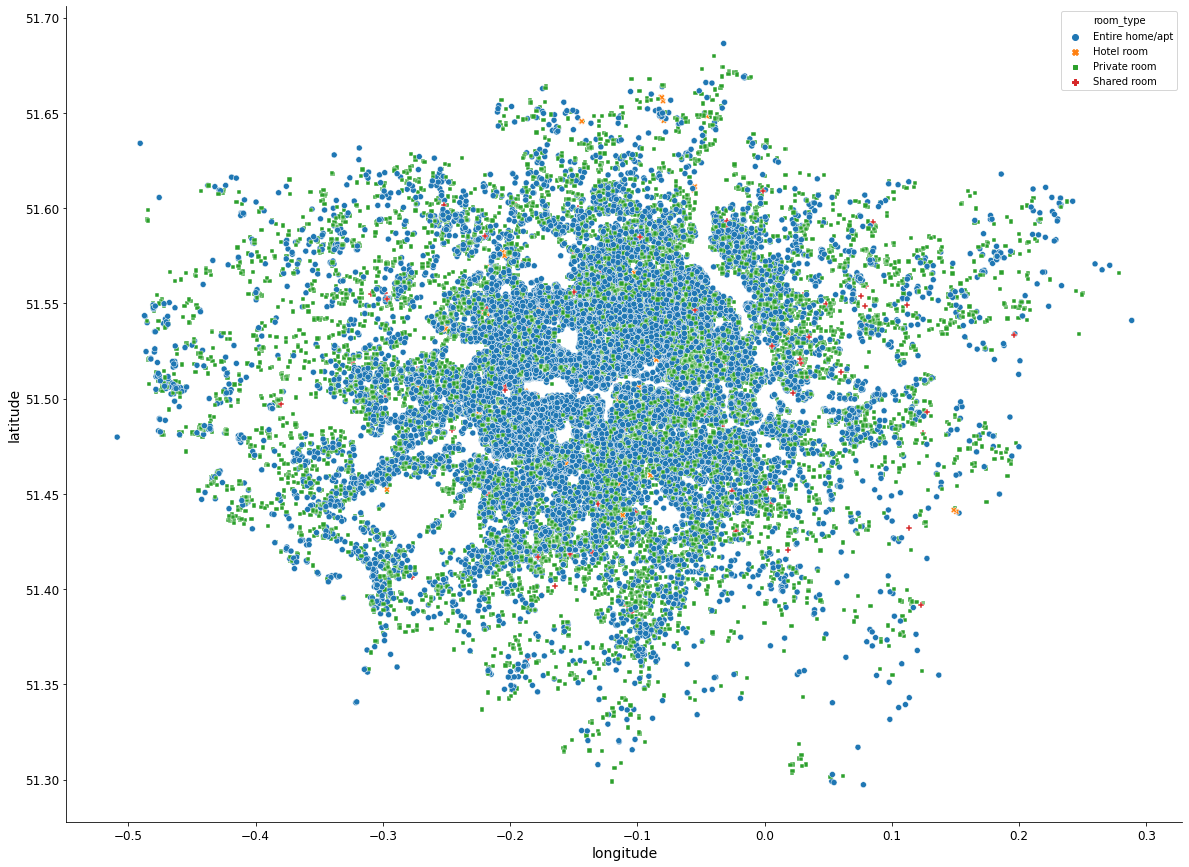

In [327]:
# folium visual map is not used as the cluster colours blend, preventing from differentiating the room types
#Ian L. and Tsvetina C. 
plt.figure(figsize = (20, 15))
sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'room_type', style = 'room_type')

We can check for the cluster of room types available. There are very few shared rooms available compared to private rooms & entire homes.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='number_of_reviews'>

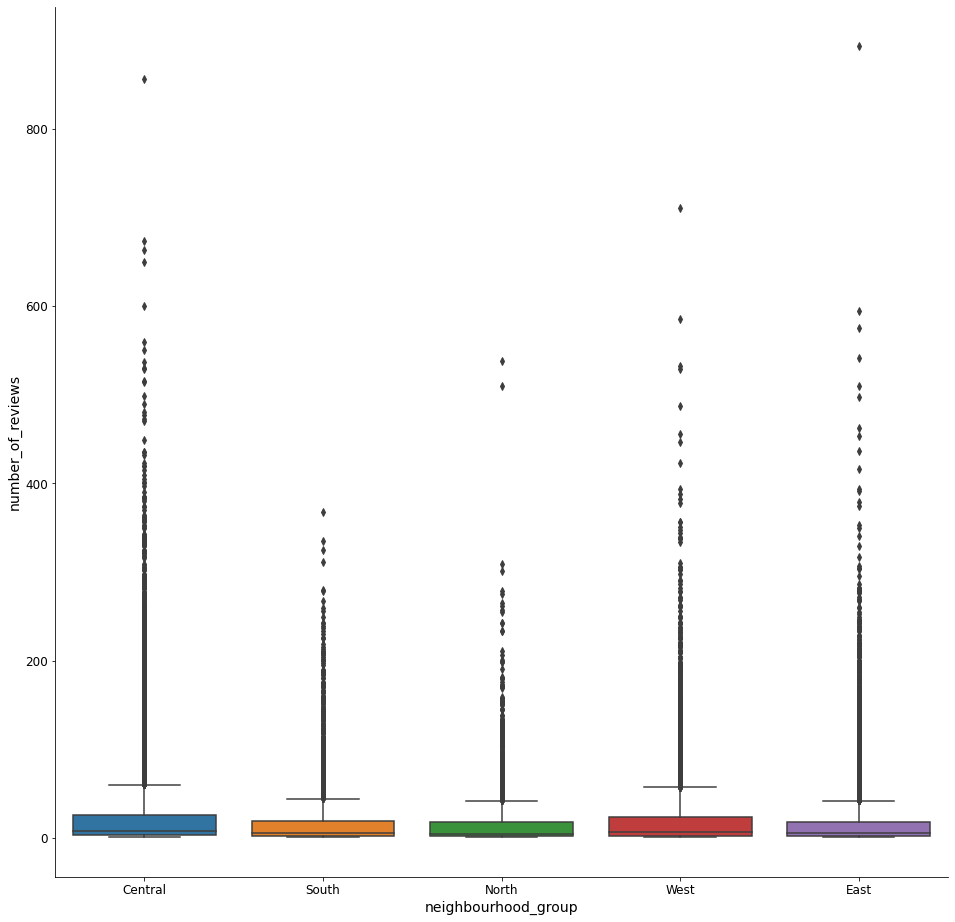

In [328]:
#Ian L. 
sns.boxplot(x = 'neighbourhood_group', y = 'number_of_reviews', data = df) #Ian 

Before starting the analysis for review counts, we need to check for outliers. It does have outliers so we must either take them out or go around them. 

[Text(0.5, 1.0, 'Top rented listings according to neighbourhood')]

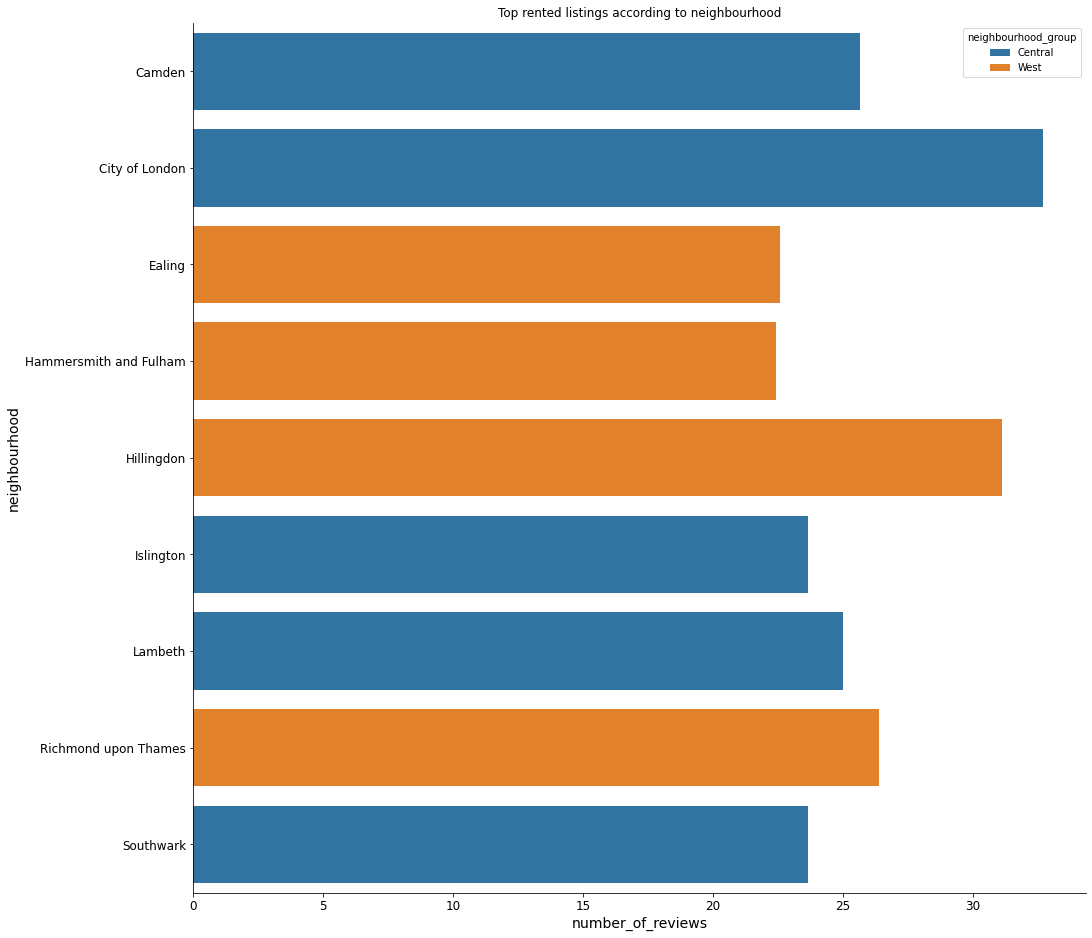

In [329]:
#Ian L., Tsvetina C. and Xifan Z. 
top_listings = df.groupby('neighbourhood_group').mean().sort_values(by = 'number_of_reviews', ascending = False).reset_index()
top10_listings = df.groupby(['neighbourhood_group', 'neighbourhood']).mean().sort_values(by = 'number_of_reviews', ascending = False).reset_index().head(10)
sns.barplot(x = 'number_of_reviews', y = top10_listings['neighbourhood'], data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, estimator = np.mean, order = ['Camden','City of London', 'Ealing','Hammersmith and Fulham','Hillingdon','Islington', 'Lambeth','Richmond upon Thames', 'Southwark']).set(title = 'Top rented listings according to neighbourhood')
plt.show()

Since 'review_counts' have many outliers, we should use mean instead of median as the measure of central tendency.
From the graph made above, we can conclude that hosts in Central are the most busy and West London have the most ratings overall. However, the number of reviews could also mean that these areas are busier so we cannot conclude that they are the "best" areas until we find correlation with number of customers.

[Text(0.5, 1.0, 'Average number of customers that hosts get in each borough')]

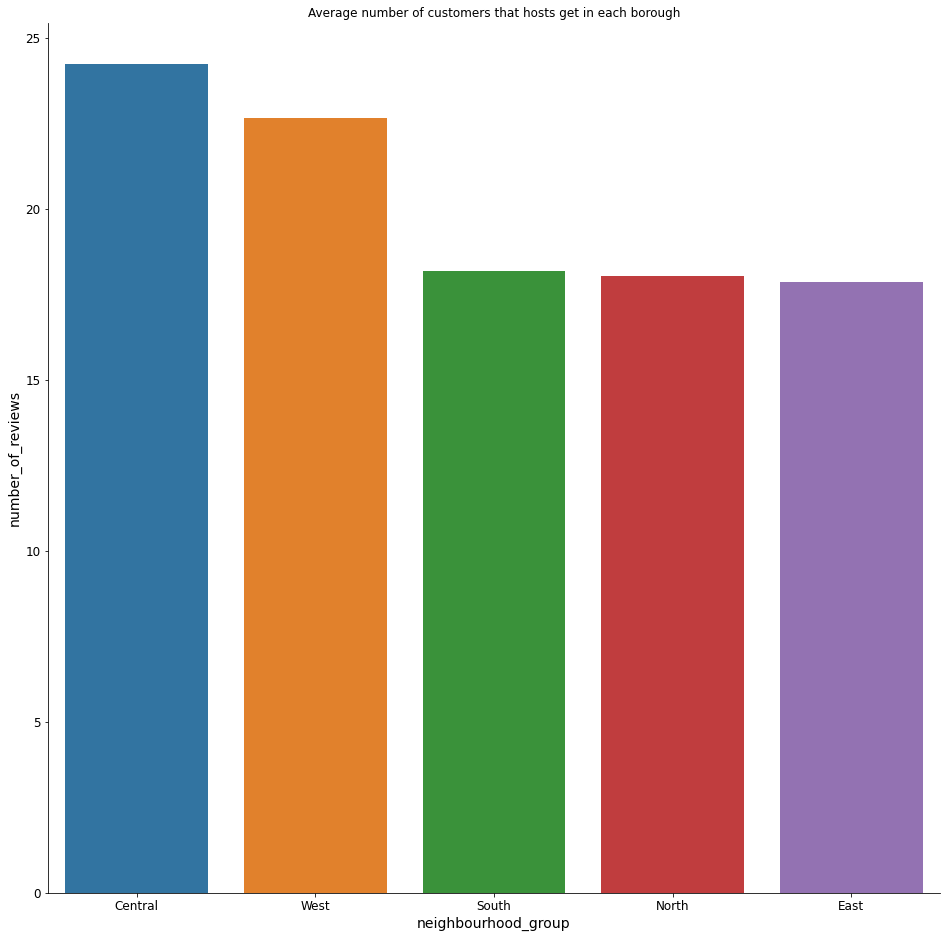

In [330]:
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews', data = top_listings, ci = False, dodge = False).set(title = 'Average number of customers that hosts get in each borough')
plt.show() #Ian and Tsvetina

In terms of getting customers City of London, Hillingdon and Richmond Upon Thames seems to be the top 3 hotspots for hosts to get many customers. Following on the interpretation above, it does show that Central are West are the most visited areas overall. Therefore, high number of reviews. 

## 4.2 Price Based Analysis

In [331]:
#Tsvetina C. 
#Description of various metrics regarding price
df['price'].groupby(df["neighbourhood_group"]).describe().round(2)

count    mean     std   min   25%   50%    75%      max
neighbourhood_group                                                           
Central              21237.0  152.96  345.77   0.0  60.0  99.0  156.0  17709.0
East                 13603.0   88.61  147.44   0.0  37.0  65.0  103.0   7186.0
North                 2724.0   86.16  241.81  10.0  34.0  55.0   95.0   8000.0
South                 4952.0   99.75  186.25   0.0  40.0  68.0  110.0   7000.0
West                  6993.0  107.34  161.42   8.0  40.0  74.0  120.0   5565.0

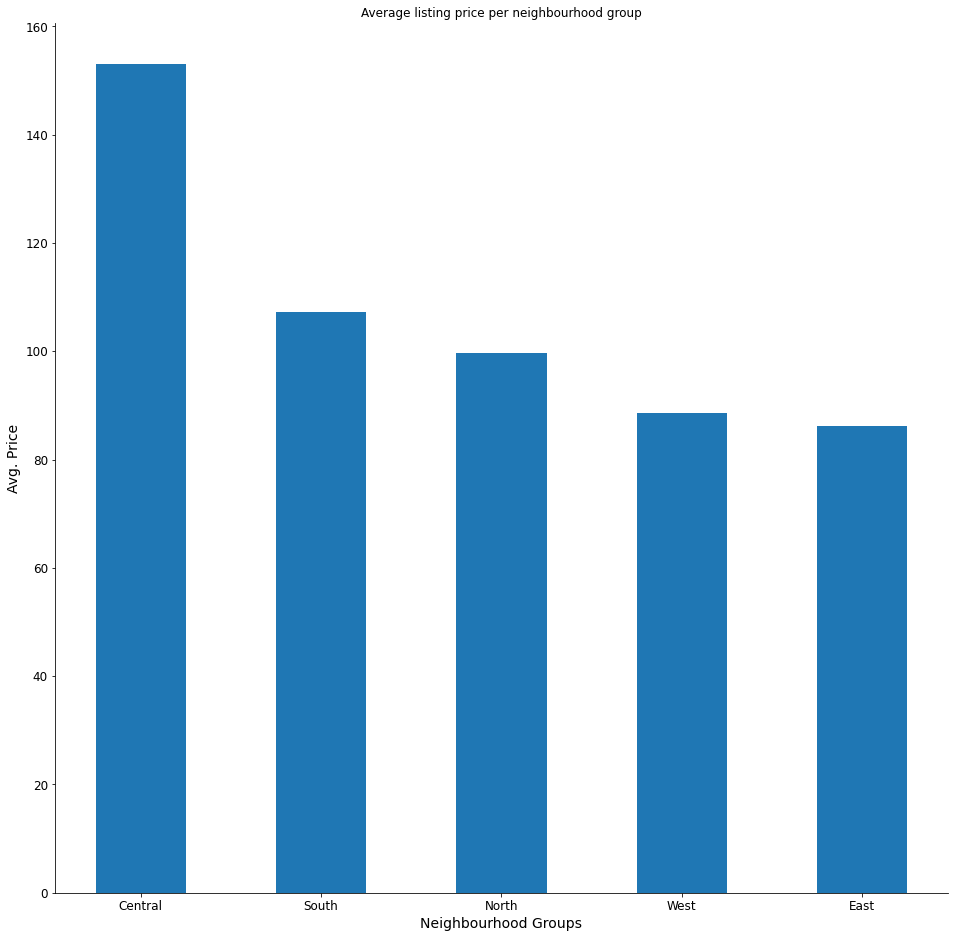

In [332]:
#Tsvetina C.
#Average price depending on neighbourhood group
price_per_group = df.price.groupby(by=df.neighbourhood_group).mean().sort_values(ascending=False)
bar_plot(df.neighbourhood_group.unique(),price_per_group,'Neighbourhood Groups','Avg. Price','Average listing price per neighbourhood group','center',0.5)

As shown in the bar chart above, the highest average price per night for Airbnbs is in the Central area (150 GBP). Following are South, North, West and East with South being second in highest average price (110 GBP).

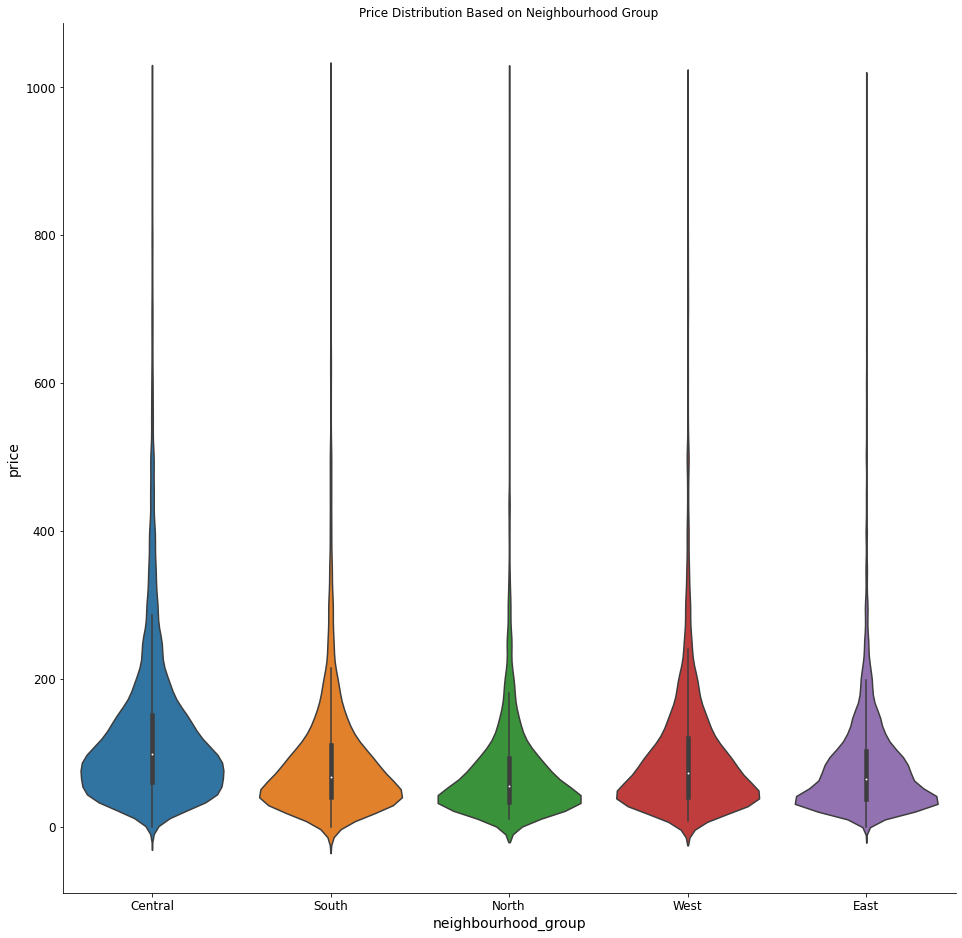

In [333]:
#Tsvetina C.
#Distribution of price based on neighbourhood group.
# As there are outliers, price is cut off below 1000 
distribution = sns.violinplot(x="neighbourhood_group", y="price",
                    data=df[df.price < 1000],
                    scale="width").set_title("Price Distribution Based on Neighbourhood Group")

The violin plot showcases the distribution of prices in London Airbnbs based on neighbourhood groups. As depicted by the description above the Maximum price reaches 17709.08. Therefore, to have a more comprehensive visualisation of the distribution, the price level is cut off to 1000 GBP. The Central neighbourhood group has the highest range of prices for the listings. The other 4 neighbourhood groups show similar distribution, the lowest being East.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Camden'),
  Text(1, 0, 'City of London'),
  Text(2, 0, 'Kensington and Chelsea'),
  Text(3, 0, 'Islington'),
  Text(4, 0, 'Lambeth'),
  Text(5, 0, 'Southwark'),
  Text(6, 0, 'Westminster')])

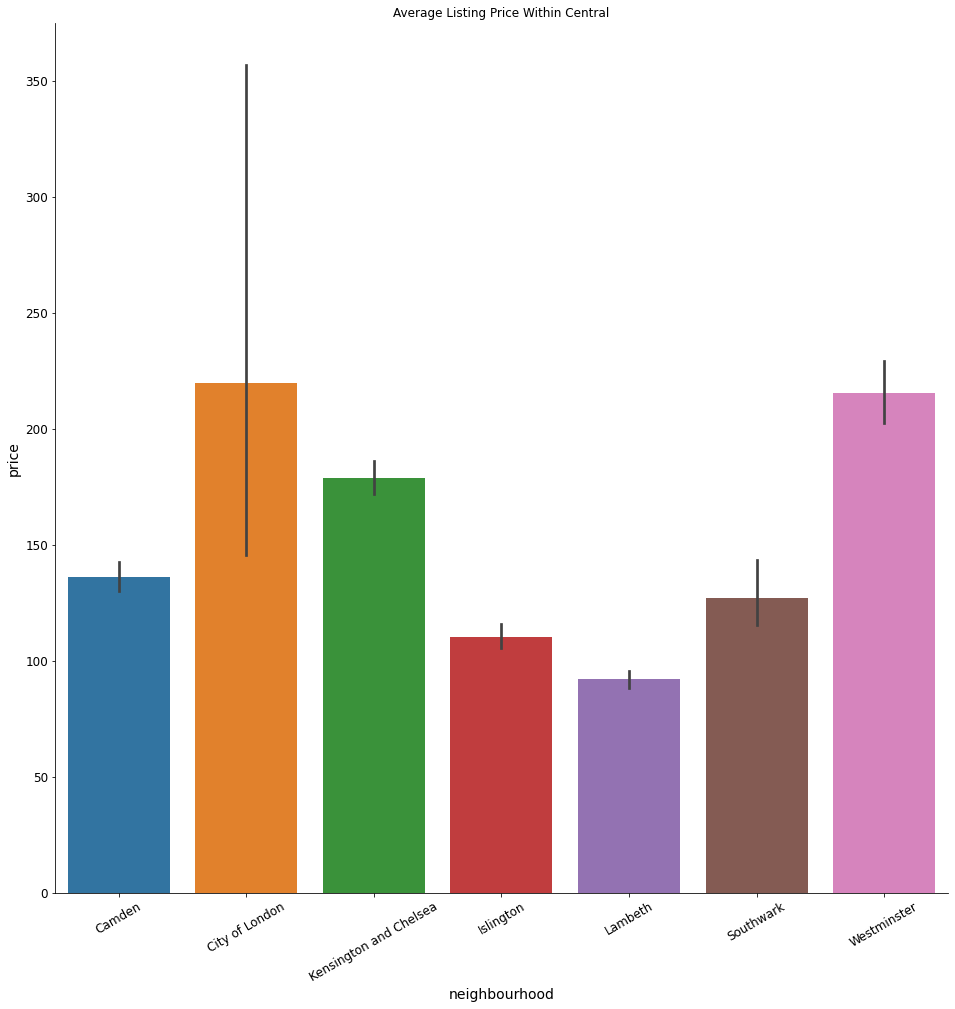

In [334]:
#Tsvetina C.
central_distribution = sns.barplot(x=df['neighbourhood'], y=df['price'],
                    data=df, order=['Camden', 'City of London', 'Kensington and Chelsea', 'Islington', 'Lambeth', 'Southwark', 'Westminster']).set_title('Average Listing Price Within Central')
plt.xticks(rotation=30)

Within the Central neighbourhood group, the highest average price is in "City of London" and "Westminster". The cheapest Airbnbs can be booked in Lambeth and Islington.

Text(0.5, 1.0, 'Average Listing Price per Room Type in London')

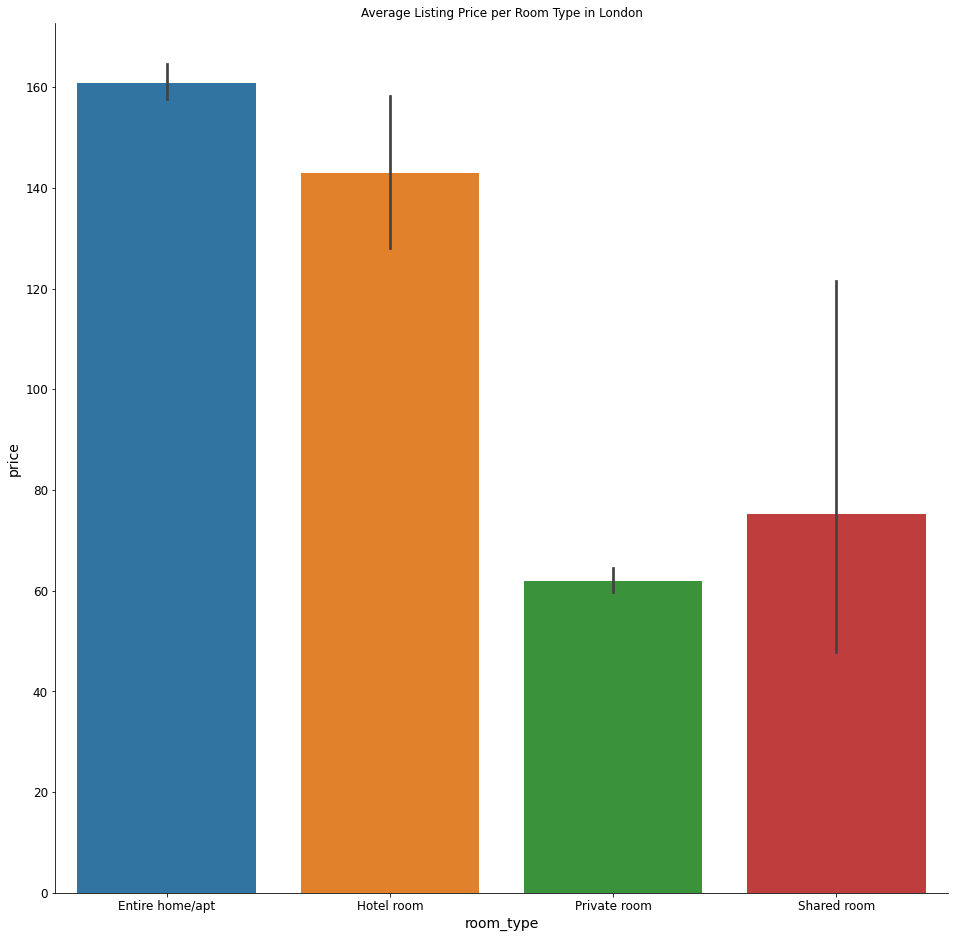

In [335]:
#Tsvetina C.
#Bar chart depicting average listing price per room type
sns.barplot(x='room_type', y="price", data=df).set_title('Average Listing Price per Room Type in London')
plt.show()

The median price for entire homes/apartments is highest, which is not surprising, due to the size of entire homes compared to single/shared rooms. Private rooms have the lowest median price.

Text(0.5, 1.0, 'Average Listing Price per Room Type in Central')

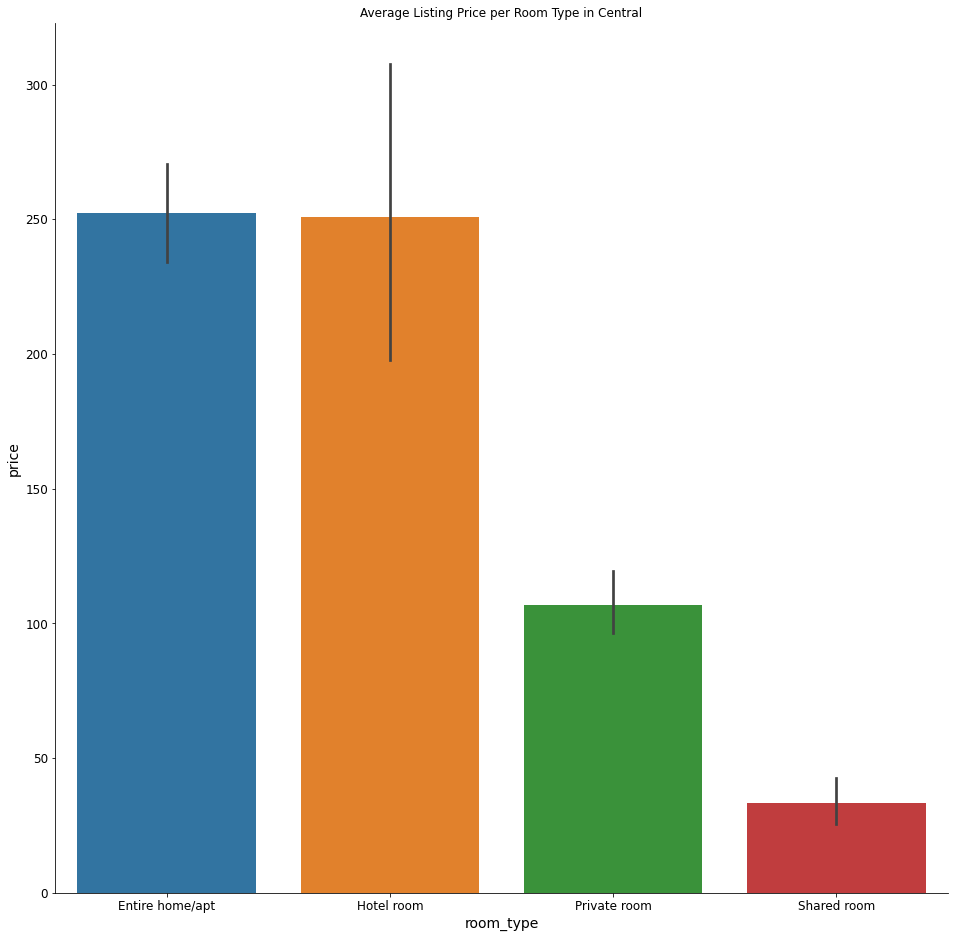

In [336]:
#Tsvetina C.
#filtering the dataframe, so it only keeps rows with neighbourhood being Westminster or City of London
central_area = df[df['neighbourhood'].isin(['City of London', 'Westminster'])] 
sns.barplot(x='room_type', y="price", data=central_area).set_title('Average Listing Price per Room Type in Central')

Focusing on the highest priced neighbourhoods in London - Westminster and City of London - the average price per Airbnb is 250 GBP for entire homes/apartments and hotel rooms, followed by private rooms costing about 120 GBP per night.

In [337]:
#Tsvetina C.
#Count of values depending on room type.
central_area['room_type'].value_counts()

Entire home/apt    4106
Private room       1352
Hotel room           55
Shared room          33
Name: room_type, dtype: int64

The most common types of rooms are entire home/apartments and private rooms.

## 4.3 Duration Based Analysis
#### Rental duration type and Neighbourhood group

Text(0, 0.5, 'Proportions')

Text(0.5, 1.0, 'Rental duration type proportioned by neighbourhood group')

[Text(0, 5, '42.88'),
 Text(0, 5, '27.37'),
 Text(0, 5, '14.18'),
 Text(0, 5, '10.04'),
 Text(0, 5, '5.54')]

[Text(0, 5, '43.5'),
 Text(0, 5, '31.92'),
 Text(0, 5, '11.92'),
 Text(0, 5, '8.5'),
 Text(0, 5, '4.17')]

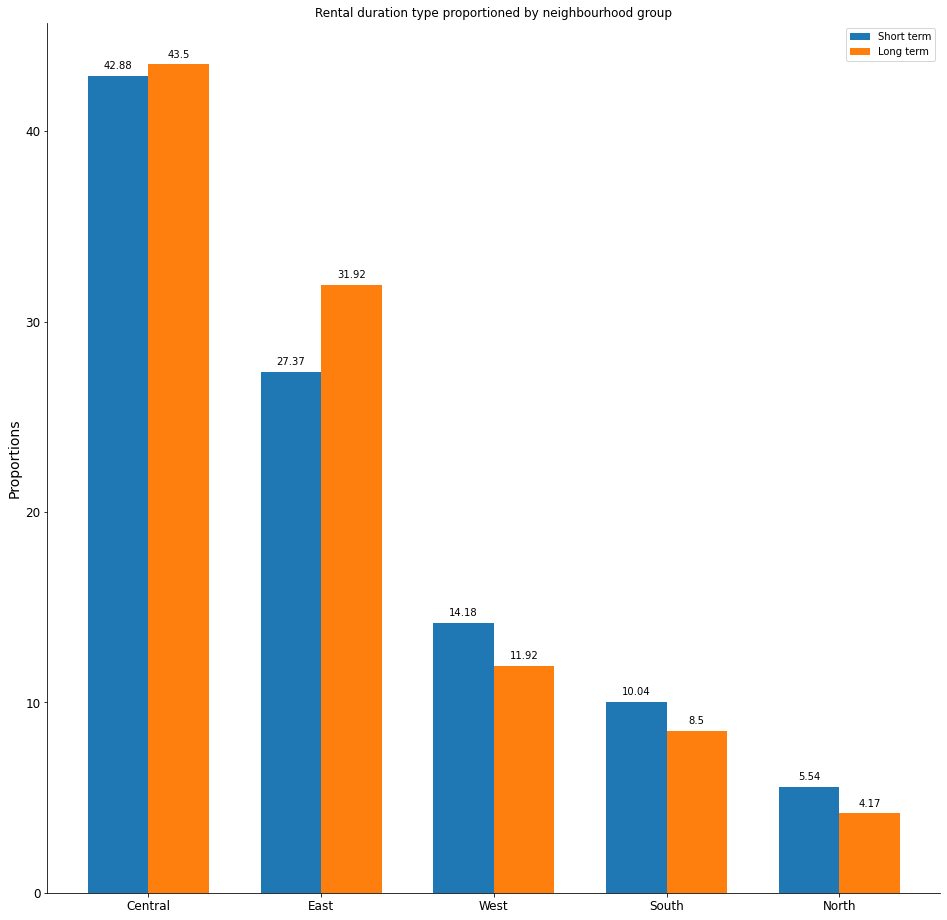

In [338]:
# calculate the proportion of different rental duration types in each neighbourhood group
# Xifan Z.
st_per_group = df.short_term.loc[df['short_term']==1].groupby(by=df.neighbourhood_group).count()
st_group_proportion = (st_per_group/df.short_term.loc[df['short_term']==1].count() * 100).round(2)
lt_per_group = df.short_term.loc[df['short_term']==0].groupby(by=df.neighbourhood_group).count()
lt_group_proportion = (lt_per_group/df.short_term.loc[df['short_term']==0].count() * 100).round(2)

y1 = st_group_proportion.sort_values(ascending=False)
y2 = lt_group_proportion.sort_values(ascending=False)
labels = y1.index
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, y1, width, label='Short term')
bar2 = ax.bar(x + width/2, y2, width, label='Long term')

ax.set_ylabel('Proportions')
ax.set_title('Rental duration type proportioned by neighbourhood group')
ax.set_xticks(x,labels)
ax.legend()
## add bar label [!!need to upgrade matplotlib into 3.5.0 version]
ax.bar_label(bar1,padding=5)
ax.bar_label(bar2,padding=5)

plt.show()

The above graph indicates two facts:
1. It proved again that majority of Airbnb listings are concentrated in Central and Eastern London.
2. More than 75% of long-term rentals are in Central and Eastern London.

Note that due to the relative unbalanced number of observations for short-term rental and long-term rental, we cannot conclude there are more long-term rentals in Central and Eastern London from this graph.

#### Rental Duration and room types

In [339]:
# preparation for variables
# Xifan Z.
cate_room_type = df.room_type.groupby(df.short_term).value_counts()
total_sr_rooms = cate_room_type[1].sum()
total_lr_rooms = cate_room_type[0].sum()
cate_room_type

short_term                 
0           Entire home/apt      809
            Private room         391
            Hotel room             0
            Shared room            0
1           Entire home/apt    27899
            Private room       19821
            Hotel room           323
            Shared room          266
Name: room_type, dtype: int64

Text(0, 0.5, 'Proportions')

Text(0.5, 1.0, 'Rental duration type per room type')

[Text(0, 5, '57.75'),
 Text(0, 5, '41.03'),
 Text(0, 5, '0.67'),
 Text(0, 5, '0.55')]

[Text(0, 5, '67.42'), Text(0, 5, '32.58'), Text(0, 5, '0'), Text(0, 5, '0')]

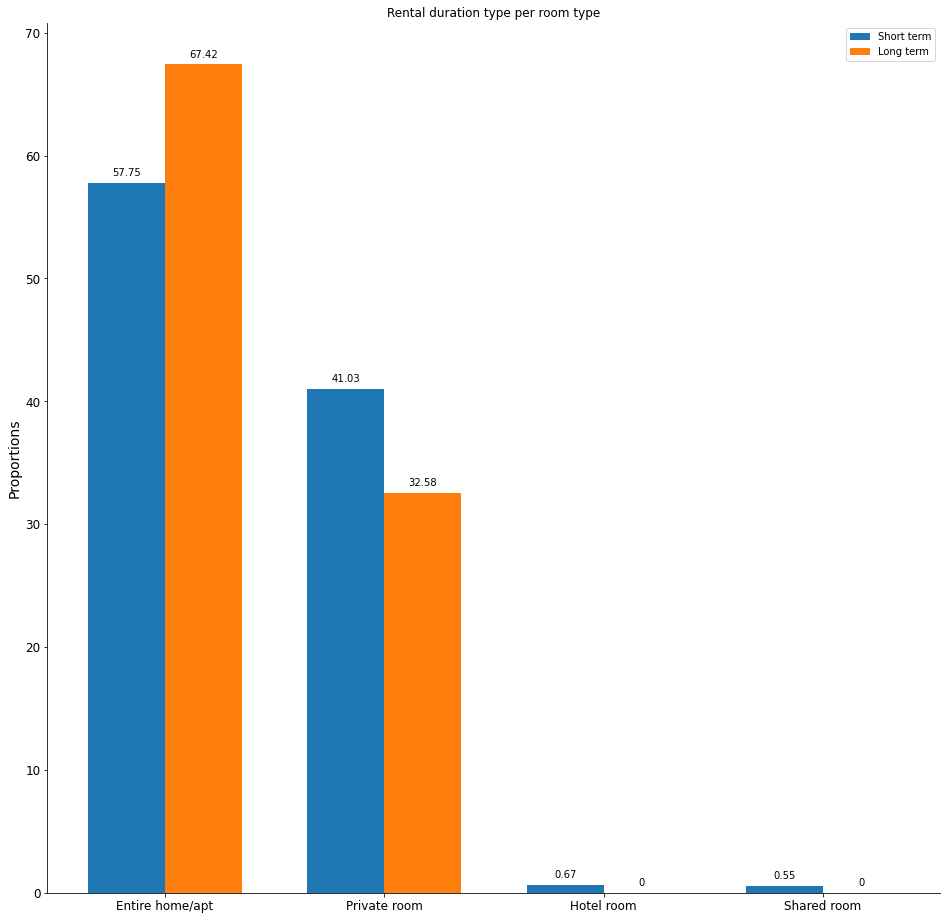

In [340]:
# define x and ys
# Xifan Z.
y1 = pd.Series(
    {"Entire home/apt":((cate_room_type[1][0]/total_sr_rooms)*100).round(2),
     "Private room": ((cate_room_type[1][1]/total_sr_rooms)*100).round(2),
     "Hotel room": ((cate_room_type[1][2]/total_sr_rooms)*100).round(2),
     "Shared room":((cate_room_type[1][3]/total_sr_rooms)*100).round(2)}
)
y2 = pd.Series(
    {"Entire home/apt":((cate_room_type[0][0]/total_lr_rooms)*100).round(2),
     "Private room": ((cate_room_type[0][1]/total_lr_rooms)*100).round(2),
     "Hotel room": 0.00,
     "Shared room":0.00}
)

labels = y1.index
x = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, y1, width, label='Short term')
bar2 = ax.bar(x + width/2, y2, width, label='Long term')

ax.set_ylabel('Proportions')
ax.set_title('Rental duration type per room type')
ax.set_xticks(x,labels)
ax.legend()

ax.bar_label(bar1,padding=5) # need to updata matplotlib to 3.5.0 to use this function
ax.bar_label(bar2,padding=5)

plt.show()

The graph above gives an overall idea of the proportional distribution of different rental duration types based on different room types. We found two things. First, the entire home or apartment and private room are the two most popular room types. Secondly, long-term rentals are more likely to be an entire homes or apartments.

## 4.4 Income Based Analysis

In this section we looked at income per room type and used a regression tree to 

In [341]:
# Selecting only the properties with income > 0
# Dorin U. 
df_copy = df_copy[df_copy['income_per_month'].isna() == False] 

In [342]:
# Resetting the index to account for the deleted data
# Dorin U. 
df_copy.reset_index(inplace = True, drop = True)

In [343]:
# Creating a new column with nan values
# Dorin U. 
df_copy['room_type_bool'] = np.nan

# create a list
numbers = df_copy['room_type']

In [344]:
# Associating each room type to a numeric index
# Dorin U. 
i = len(df_copy)
a = range(0,i)

for row in a:
    if df_copy['room_type'][row] == "Private room":
        df_copy['room_type_bool'][row] = 0
    elif df_copy['room_type'][row] == 'Entire home/apt':
        df_copy['room_type_bool'][row] = 1
    else:
        df_copy['room_type_bool'][row] = 2

/tmp/ipykernel_21439/1613242731.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['room_type_bool'][row] = 0
/tmp/ipykernel_21439/1613242731.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['room_type_bool'][row] = 1
/tmp/ipykernel_21439/1613242731.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['room_type_bool'][row] = 2


In [345]:
# Dorin U. 
df_copy['factorised'] = pd.factorize(df_copy['neighbourhood'])[0]

In [346]:
# Dorin U. 
x = np.array(df_copy[['room_type_bool', 'factorised']])
x
classifier = sklearn.tree.DecisionTreeRegressor(random_state = 0, max_depth=3)
mod3 = classifier.fit(x, df_copy['income_per_month'])

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       ...,
       [ 1., 12.],
       [ 0.,  8.],
       [ 1.,  1.]])

In [347]:
# Dorin U. 
fig = plt.figure(figsize=(120, 100))
plot_tree(mod3, 
          feature_names=['Room type', 'Area'], 
          filled=True, 
          impurity=True, 
          rounded=True,
          fontsize = 60)
fig.tight_layout()
plt.show()

[Text(3348.0, 4756.5, 'Room type <= 0.5\nsquared_error = 3592196.389\nsamples = 49530\nvalue = 612.476'),
 Text(1674.0, 3397.5, 'Area <= 12.5\nsquared_error = 1309170.864\nsamples = 20224\nvalue = 344.034'),
 Text(837.0, 2038.5, 'Area <= 2.5\nsquared_error = 1680909.916\nsamples = 10236\nvalue = 445.23'),
 Text(418.5, 679.5, 'squared_error = 1725397.573\nsamples = 2960\nvalue = 560.926'),
 Text(1255.5, 679.5, 'squared_error = 1655150.848\nsamples = 7276\nvalue = 398.163'),
 Text(2511.0, 2038.5, 'Area <= 23.5\nsquared_error = 906951.398\nsamples = 9988\nvalue = 240.326'),
 Text(2092.5, 679.5, 'squared_error = 168220.948\nsamples = 8597\nvalue = 226.665'),
 Text(2929.5, 679.5, 'squared_error = 5464352.613\nsamples = 1391\nvalue = 324.758'),
 Text(5022.0, 3397.5, 'Area <= 2.5\nsquared_error = 5083659.959\nsamples = 29306\nvalue = 797.727'),
 Text(4185.0, 2038.5, 'Area <= 1.5\nsquared_error = 6690227.188\nsamples = 8664\nvalue = 1100.855'),
 Text(3766.5, 679.5, 'squared_error = 1432003.223

In [348]:
# Dorin U. and Xifan Z.

## tuning hyperparameter: max_depth
# set a range of max_depth to test
param_grid = {'max_depth' : np.arange(2,8,1),}
# fit and get results
CV_mod = GridSearchCV(estimator=mod3, param_grid=param_grid, cv= 5, return_train_score=True)
CV_mod.fit(x, y)
result = pd.DataFrame(CV_mod.cv_results_)

## check the best result from tweaking max_depth
print(result['params'].loc[result['mean_train_score'] == result['mean_train_score'].max()])

## refit model and check the model accuracy
mod_tunned = sklearn.tree.DecisionTreeRegressor(random_state = 0, max_depth=7)
mod_tunned.fit(x,y)
print("Decision tree before tuning accuracy: %0.4f" % mod3.score(x, y))
print("Decision tree after tuning accuracy: %0.4f" % mod_tunned.score(x, y))

NameError: name 'y' is not defined

Codes above domenstrate a hyperparameter tunning process. The model accuracy increased from 0.026 to 0.033.

## 4.5 Keyword Based Analysis

This section will look at listing titles, finding the most common words used, and displaying this in a wordcloud below:

In [ ]:
# Markus T.
text = " ".join(name for name in df['name']) #creating a single text block in order to analyze 
print ("The 'Name' column has {} total words.".format(len(text)))

An initial wordcloud showed several words which were not very descriptive or unique. A stopwords function needs to be applied to filter out words which do not provide insight:

In [ ]:
# Markus T.
stopwords = set(STOPWORDS) 
stopwords.update(["bedroom", "flat", "bed", "loft", "room", "home", "studio", "double", "single", "house", "apartment", "one", "two"])

In [ ]:
# Markus T.
wordcloud = WordCloud(stopwords = stopwords, background_color = "white", max_words = 50, scale = 4).generate(text) 

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Markus T.
print(wordcloud.words_.keys()) # lists all key words largest to smallest 

Top 8 most used descriptive words in order are:
'Modern', 
'Spacious', 
'Central London', 
'Cosy', 'Garden', 
'London', 
'Bright', 
'Lovely'

Airbnb owners and potential owners can easily analyse this wordcloud and common words list to create more unique descriptions to stand out from other listings. Conversely, owners may actually choose to use words from the list in their listing, as such titles are likely common due to their popularity and success rate in achieving bookings. Either way this offers another useful resource for Airbnb owners.

# 5. Conclusion

## 5.1 Findings

This report has offered several key insights into the Airbnb market in London, and can serve as valuable resource for current and prospective Airbnb owners.

Firstly, the report has found that investing in a property in Central London (more specifically the City of London and Westminster) will yield far higher income, as the prices are highest per night. However, these properties also pose a bigger risk with higher expenses, as losses due to low occupancy will be much greater. Airbnb investors with modest incomes may choose more affordable areas, such as West or East London, for their initial purchase.

The duration and property-type analysis has found that the average price for entire homes/apartments is more than twice as much as for private rooms. Therefore, if an owner wanted to maximize income, it may be preferable to vacate their property entirely rather than stay living alongside their tenants. This could incentivize Airbnb owners to rent their own flat despite owning an Airbnb property, as the additional income may make up for their additional rental cost.

The analysis has also found that long-term rentals are more common in Central and Eastern London, so an owner hoping to maximize occupancy levels with a long-term rental may choose to purchase a property in these areas.

The keyword and wordcloud analysis also provide a useful reference for Airbnb owners. They can use the list as inspiration for their own listing, noting that descriptive and positive adjectives are very popular, and therefore more likely to encourage booking.




## 5.2 Limitations

The limitations in our report are largely centred around a lack of access to certain types of data. For example, price for acquiring the actual Airbnb properties is not considered. Data regarding specific property prices could help potential investors better understand the costs of operating an Airbnb (e.g. mortgage, property taxes), and help them choose a location not based solely on price and income.

The dataset used does not offer direct information on income for each property, as Airbnb does not release these figures publicly. Therefore, an estimation had to be used based on review rate, average nights per stay, and price (described in detail above). Having real world data on income generated for each property, along with income and details for each stay, would improve the accuracy of our data and provide more exact insights into which areas and property types produce the most income. It would also allow us to assess the real review rate for each property, the length of each stay, along with several other metrics which could produce even greater insights. 

Our report could also benefit from time series analysis, as our dataset does not differentiate pricing and income over different periods. Such analysis could help us better understand the impact COVID-19 had on Airbnb rentals, and if a recovery in bookings has already taken place.

For key-word analysis, future research could look at the direct correlation of net income and occupancy with certain key words. This would give further insight for owners on ways to name and describe their property to achieve the most bookings. Future research could look at other forms of qualitative data, such as photo quality or owner profiles, to provide further instruction for owners on how to curate their online listing.

Additionally, the decision tree model we build to predict the hosts' income is based on *max_depth* = 5. Although the model accuracy increased after we tunned this parameter, there still is room to improve. 

## Reference


Airbnb. 2021. *What are some differences between long-term hosting and short-term hosting?* [online] Available at: <https://www.airbnb.co.uk/help/article/1354/what-are-some-differences-between-longterm-hosting-and-shortterm-hosting> [Accessed 4 December 2021].

Airbnb, n.d.,*Pricing your listing*, Available at: <https://www.airbnb.co.uk/help/article/52/pricing-your-listing> [Accessed 12 December 2021].

Airbnb, 2021. *Airbnb Economic Impact.* [online] The Airbnb Blog - Belong Anywhere. Available at: <https://blog.atairbnb.com/economic-impact-airbnb/> [Accessed 13 December 2021].

Budget and Legislative Analyst, Sfbos.org. 2015. *Policy Analysis Report.* [online] Available at: <https://sfbos.org/sites/default/files/FileCenter/Documents/52601-BLA.ShortTermRentals.051315.pdf> [Accessed 12 December 2021].

En.wikipedia.org. 2021. *List of sub-regions used in the London Plan - Wikipedia.* [online] Available at: <https://en.wikipedia.org/wiki/List_of_sub-regions_used_in_the_London_Plan?oldformat=true> [Accessed 4 December 2021].

Inside Airbnb, 2021. *Inside Airbnb. Adding data to the debate..* [online] Inside Airbnb. Available at: <http://insideairbnb.com/about.html> [Accessed 12 December 2021].

TRVLGUIDES. 2021. *Short-Term vs. Long-Term Airbnb Rentals \[Comparison Guide\] - TRVLGUIDES.* [online] Available at: <https://trvlguides.com/articles/airbnb-short-term-long-term-rentals> [Accessed 4 December 2021].



## Appendix

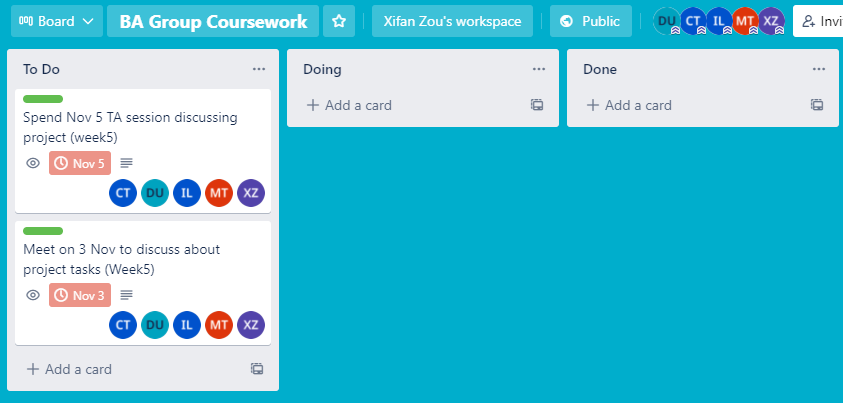

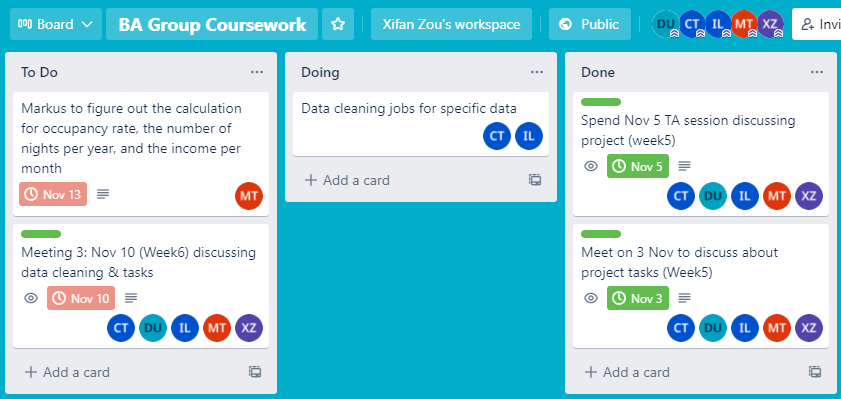

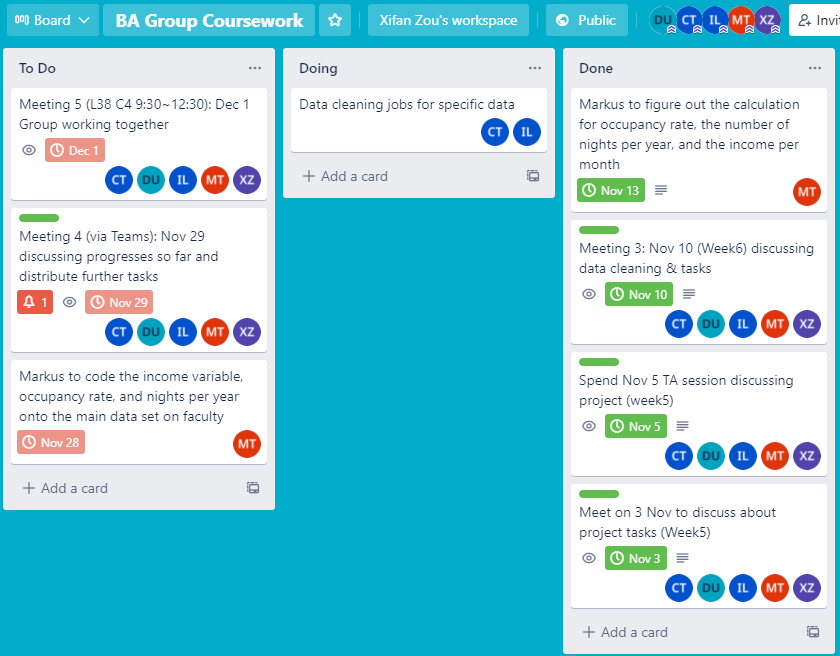

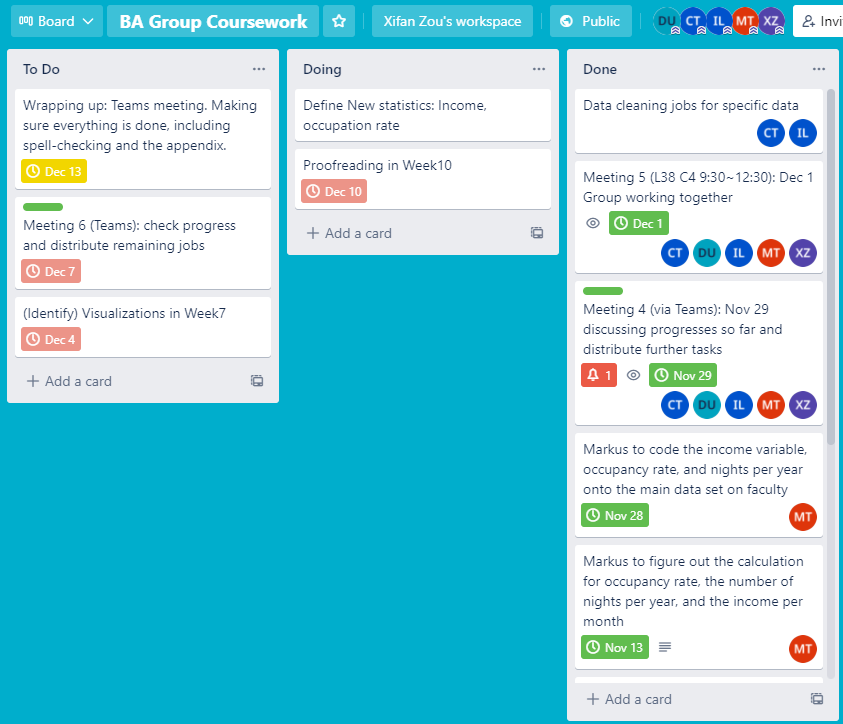

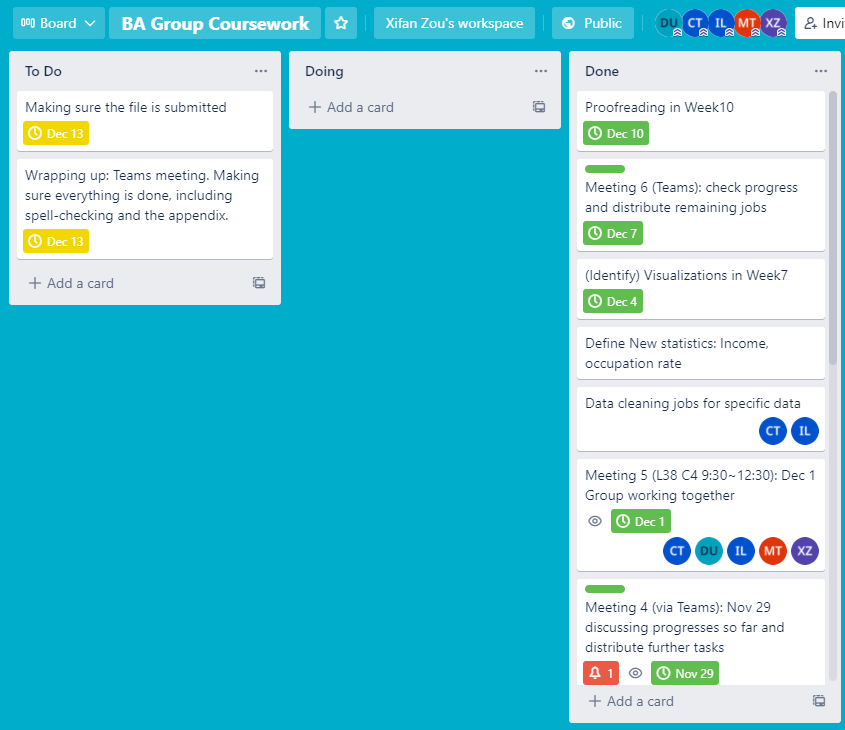

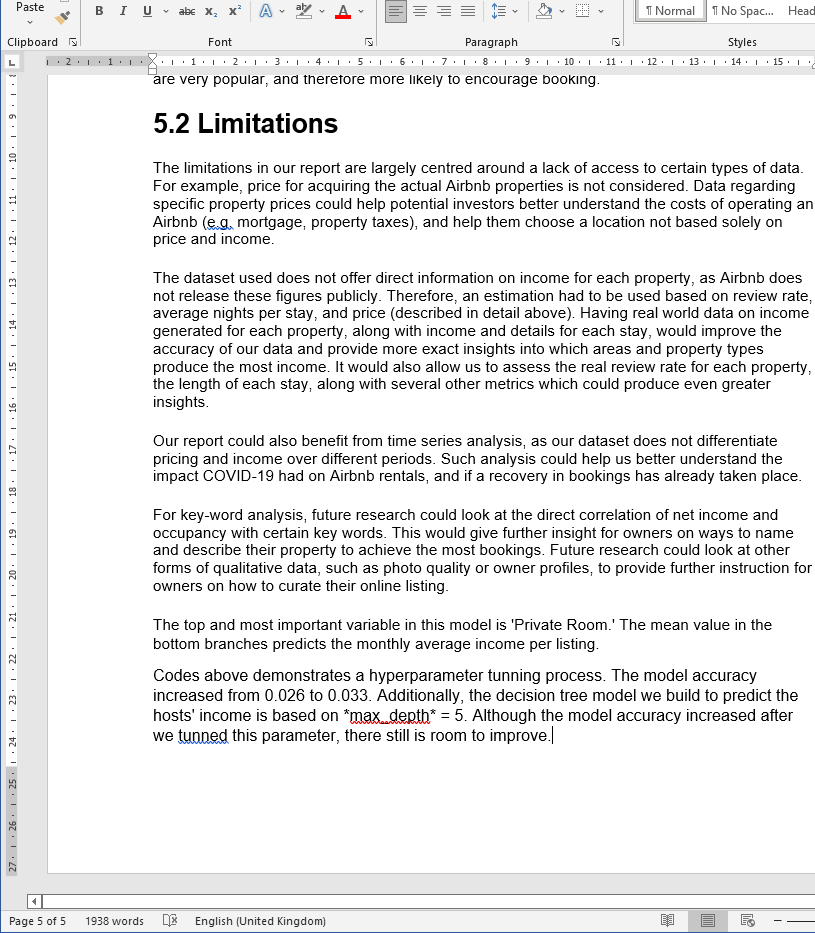